63011212019 อาทิตย์ ทวีบท รหัสวิชา 1204317 Sec 1 (21/09/2565)

Data Wrangling 

1) ทำการ import libraries ที่จำเป็น โดยจะใช้ pandas ในการจัดการข้อมูลในรูปแบบของ
ตาราง
ทำข้อความเป็นตัวหนา

In [1]:
import pandas as pd

 2) ทำการปรับการแสดงผลของข้อมูลโดยจะให้ข้อมูลแสดงผลในรูปแบบของข้อมูลที่มีทศนิยม 2 
ตำแหน่ง

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

3) ทำการนำข้อมูลเข้า โดยในตัวอย่างนี้จะใช้ข้อมูลของราคาอัตราแลกเปลี่ยนสกุลเงินของ 
Brave New Coin ซึ่งจะเป็นข้อมูลประวัติของราคาอัตราแลกเปลี่ยนสกุลเงินพร้อมกับข้อมูล
ที่เกี่ยวข้องอื่น ๆ ในตัวอย่างนี้จะเป็นแค่ข้อมูลบางส่วนเท่านั้นเพื่อใช้สำหรับการศึกษา

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DS/dataPrediction/BNC2_sample.csv',
                 names=['Code','Date','Open','High','Low','Close','Volume','VWAP','TWAP'])
df.head()

,Code,Date,Open,High,Low,Close,Volume,VWAP,TWAP
0,GWA_BTC,2014-04-01,467.28,488.62,467.28,479.56,"74,776.48",482.76,482.82
1,GWA_BTC,2014-04-02,479.20,494.30,431.32,437.08,"114,052.96",460.19,465.93
2,GWA_BTC,2014-04-03,437.33,449.74,414.41,445.60,"91,415.08",432.29,433.28
3,GWA_BTC,2014-04-04,445.18,456.10,429.16,449.81,"51,147.27",443.46,443.93
4,GWA_BTC,2014-04-05,450.08,464.09,445.16,461.70,"28,449.19",452.53,452.95


4) ทำความเข้าใจข้อมูล
ปัญหาหลักของข้อมูลดิบทั่วไป คือ มีข้อมูลทั้งที่จำเป็นและไม่จำเป็นอยู่ด้วยกัน ทำให้ปริมาณ
สารสนเทศในข้อมูลนั้นมีปริมาณมาก โดยเฉพาะอย่างยิ่งข้อมูลที่มีลักษณะเป็นแบบ time 
series -- “ข้อมูลควรจะต้องอยู่รูปแบบเดียวกันทั้งตาราง”
ข้อมูลที่เรามีตอนนี้จะเป็นข้อมูลที่บันทึกรายการแบบ record โดยจะมีการใช้ code ในการ
แยกประเภทของข้อมูล โดยในข้อมูลของเราเราจะ code ที่ต่างกันคือ

In [4]:
print(df.Code.unique())

['GWA_BTC' 'GWA_ETH' 'GWA_LTC' 'GWA_XLM' 'GWA_XRP' 'MWA_BTC_CNY'
 'MWA_BTC_EUR' 'MWA_BTC_GBP' 'MWA_BTC_JPY' 'MWA_BTC_USD' 'MWA_ETH_CNY'
 'MWA_ETH_EUR' 'MWA_ETH_GBP' 'MWA_ETH_JPY' 'MWA_ETH_USD' 'MWA_LTC_CNY'
 'MWA_LTC_EUR' 'MWA_LTC_GBP' 'MWA_LTC_JPY' 'MWA_LTC_USD' 'MWA_XLM_CNY'
 'MWA_XLM_EUR' 'MWA_XLM_USD' 'MWA_XRP_CNY' 'MWA_XRP_EUR' 'MWA_XRP_GBP'
 'MWA_XRP_JPY' 'MWA_XRP_USD']


In [5]:
df[df.Code.isin(['GWA_BTC','MWA_BTC_JPY','MWA_BTC_EUR']) & (df.Date == '2018-01-01')]

,Code,Date,Open,High,Low,Close,Volume,VWAP,TWAP
1371,GWA_BTC,2018-01-01,"14,505.89","14,505.89","13,617.46","14,092.74","225,906.21","14,103.18","14,093.73"
9074,MWA_BTC_EUR,2018-01-01,"11,859.35","11,859.35","11,111.07","11,403.92","14,933.73","11,488.45","11,478.08"
11838,MWA_BTC_JPY,2018-01-01,"1,674,341.45","1,678,567.55","1,572,173.90","1,632,657.51","68,611.95","1,632,994.40","1,631,407.66"


5) ทำความเข้าใจข้อมูล
ปัญหาหลักของข้อมูลดิบทั่วไป คือ มีข้อมูลทั้งที่จำเป็นและไม่จำเป็นอยู่ด้วยกัน ทำให้ปริมาณ
สารสนเทศในข้อมูลนั้นมีปริมาณมาก โดยเฉพาะอย่างยิ่งข้อมูลที่มีลักษณะเป็นแบบ time 
series -- “ข้อมูลควรจะต้องอยู่รูปแบบเดียวกันทั้งตาราง”
ข้อมูลที่เรามีตอนนี้จะเป็นข้อมูลที่บันทึกรายการแบบ record โดยจะมีการใช้ code ในการ
แยกประเภทของข้อมูล โดยในข้อมูลของเราเราจะ code ที่ต่างกันคือ

In [6]:
print( 'Before:', len(df))

gwa_codes = [code for code in df.Code.unique() if 'GWA_' in code]

df = df[df.Code.isin(gwa_codes)]
print('After:', len(df))

Before: 31761
After: 6309


6) ปรับรูปร่างของ Data Frame (Pivot data)
ในตัวอย่างนี้เราจะทำการจัดข้อมูลในรูปแบบของช่วงเวลา 7 17 21 หรือ 28 ในขณะปัจจุบัน
ข้อมูลของเราจัดรายการในรูปแบบของประเภทของสกุลเงินดิจิทัล (code เป็น index ของ 
data frame) ที่เก็บแบบรายวัน ดังนั้นถ้าเราจัดรูปร่างของ Data Frame ใหม่โดยสนใจ
เฉพาะบางตัวแปรในตัวอย่างนี้ เราสนใจ VWAP แต่ละวันสำหรับทุกๆ สกุลเงิน ดังนั้นเรา
สามารถ pivot ข้อมูลได้ดังต่อไปนี้

In [7]:
pivoted_df = df.pivot(index='Date', columns='Code', values='VWAP') 
pivoted_df.tail()

Code,GWA_BTC,GWA_ETH,GWA_LTC,GWA_XLM,GWA_XRP
Date,,,,,
2018-01-19,"11,826.36","1,068.45",195.00,0.51,1.82
2018-01-20,"13,062.68","1,158.71",207.58,0.52,1.75
2018-01-21,"12,326.23","1,108.90",197.36,0.48,1.55
2018-01-22,"11,397.52","1,038.21",184.92,0.47,1.43
2018-01-23,"10,921.00",992.05,176.95,0.47,1.42


7) ปรับ Pivot เพื่อให้ได้ข้อมูลที่ต้องการ
ในการสร้างข้อมูลหรับไปใช้งานต่อไป เรานำข้อมูลที่ได้มาคำนวน return ทุก ๆ 7 14 21 
และ 27 วัน โดยใช้สูตรในการคำนวณคือ 

In [8]:
delta_7 = pivoted_df / pivoted_df.shift(7) - 1.0 #shift คือ 7 วันปัจจัน / ที่ผ่านมา เอามา - 1 หาความสัมพันธ์
delta_7.tail()

Code,GWA_BTC,GWA_ETH,GWA_LTC,GWA_XLM,GWA_XRP
Date,,,,,
2018-01-19,-0.18,-0.17,-0.18,-0.21,-0.22
2018-01-20,-0.13,-0.19,-0.18,-0.23,-0.29
2018-01-21,-0.15,-0.20,-0.22,-0.22,-0.30
2018-01-22,-0.21,-0.24,-0.24,-0.25,-0.32
2018-01-23,-0.11,-0.12,-0.13,-0.02,-0.04


ดังนั้นเราสามารถสร้าง Data Frame ของแต่ละช่วง 7 14 21 และ 28 และนำไปเก็บไว้ใน 
Dictionary ได้ดังน

In [17]:
delta_dict = {}
for offset in [7,14,21,28]:
  delta_dict['delta_{}'.format(offset)] = pivoted_df / pivoted_df.shift(offset) - 1.0

8) Data Melting (unpivoting)
เราทำการ Unpivot ข้อมูลให้กลับอยู่ในรูปแบบของ Column Data

In [9]:
melted_7 = delta_7.reset_index().melt(id_vars=['Date'], value_name = 'delta_7')
melted_7.tail()

,Date,Code,delta_7
6965,2018-01-19,GWA_XRP,-0.22
6966,2018-01-20,GWA_XRP,-0.29
6967,2018-01-21,GWA_XRP,-0.30
6968,2018-01-22,GWA_XRP,-0.32
6969,2018-01-23,GWA_XRP,-0.04


In [18]:
melted_dfs = []
for key, delta_df in delta_dict.items():
    melted_dfs.append( delta_df.reset_index().melt(id_vars=['Date'], value_name=key))

เพิ่ม Data Frame สำหรับ 7 วันข้างหน้า

In [19]:
return_df = pivoted_df.shift(-7) / pivoted_df - 1.0
melted_dfs.append( return_df.reset_index().melt(id_vars=['Date'], value_name='return_7'))

9) ทำการ Merge ข้อมูล
เราทำการ Merge หรือ Aggregate ข้อมูลของทั้ง 4 Data Frame เข้าด้วยกัน ในขั้นตอนนี้
เราสามารถใช้คำสั่ง merge ของ pandas ในการ merge ข้อมูลได้ เช่น

In [20]:
pd.merge(melted_dfs[0], melted_dfs[1], on = ['Date', 'Code']).tail()

,Date,Code,delta_7,delta_14
6965,2018-01-19,GWA_XRP,-0.22,-0.41
6966,2018-01-20,GWA_XRP,-0.29,-0.42
6967,2018-01-21,GWA_XRP,-0.30,-0.51
6968,2018-01-22,GWA_XRP,-0.32,-0.52
6969,2018-01-23,GWA_XRP,-0.04,-0.48


In [23]:
from functools import reduce

base_df = df[['Date', 'Code', 'Volume', 'VWAP', 'Close']]
feature_dfs = [base_df] + melted_dfs
abt = reduce(lambda left,right: pd.merge(left,right,on=['Date','Code']), feature_dfs)
abt.tail(10)

,Date,Code,Volume,VWAP,Close,delta_7,delta_14,delta_21,delta_28,return_7
6299,2018-01-14,GWA_XRP,"912,107,674.18",2.20,2.18,-0.31,0.02,1.06,1.97,-0.30
6300,2018-01-15,GWA_XRP,"823,491,754.55",2.11,1.89,-0.29,-0.04,0.92,1.84,-0.32
6301,2018-01-16,GWA_XRP,"3,872,977,355.95",1.48,1.28,-0.46,-0.36,0.35,0.85,-0.04
6302,2018-01-17,GWA_XRP,"5,111,390,628.85",1.20,1.46,-0.47,-0.57,-0.06,0.58,NaN
6303,2018-01-18,GWA_XRP,"5,156,172,462.44",1.68,1.83,-0.22,-0.51,0.23,0.59,NaN
6304,2018-01-19,GWA_XRP,"2,126,239,927.56",1.82,1.76,-0.22,-0.41,0.02,0.65,NaN
6305,2018-01-20,GWA_XRP,"1,346,913,296.52",1.75,1.76,-0.29,-0.42,-0.26,0.53,NaN
6306,2018-01-21,GWA_XRP,"1,886,060,450.81",1.55,1.51,-0.30,-0.51,-0.28,0.45,NaN
6307,2018-01-22,GWA_XRP,"1,784,992,299.63",1.43,1.50,-0.32,-0.52,-0.35,0.30,NaN
6308,2018-01-23,GWA_XRP,"2,118,335,564.32",1.42,1.42,-0.04,-0.48,-0.39,0.29,NaN


In [24]:
data = abt[[ 'VWAP', 'Volume', 'delta_7', 'delta_14', 'delta_21', 'delta_28', 'return_7', 'Close']].copy()

In [25]:
data.tail()

,VWAP,Volume,delta_7,delta_14,delta_21,delta_28,return_7,Close
6304,1.82,"2,126,239,927.56",-0.22,-0.41,0.02,0.65,NaN,1.76
6305,1.75,"1,346,913,296.52",-0.29,-0.42,-0.26,0.53,NaN,1.76
6306,1.55,"1,886,060,450.81",-0.30,-0.51,-0.28,0.45,NaN,1.51
6307,1.43,"1,784,992,299.63",-0.32,-0.52,-0.35,0.30,NaN,1.50
6308,1.42,"2,118,335,564.32",-0.04,-0.48,-0.39,0.29,NaN,1.42


In [47]:
print(data.shape)
data = data.dropna()
print(data.shape) #nan
data.tail()

(6134, 8)
(6134, 8)


,VWAP,Volume,delta_7,delta_14,delta_21,delta_28,return_7,Close
6297,2.32,"1,376,538,933.32",-0.24,0.30,1.11,2.00,-0.22,2.44
6298,2.47,"885,891,566.28",-0.18,0.05,1.15,2.22,-0.29,2.42
6299,2.20,"912,107,674.18",-0.31,0.02,1.06,1.97,-0.30,2.18
6300,2.11,"823,491,754.55",-0.29,-0.04,0.92,1.84,-0.32,1.89
6301,1.48,"3,872,977,355.95",-0.46,-0.36,0.35,0.85,-0.04,1.28


In [49]:
y_col = 'Close'
test_size = int(len(data)*0.1)
print(test_size)

613


In [50]:
train = data.iloc[:-test_size,:].copy()
test = data.iloc[-test_size:, :].copy()

print(train.shape)
print(test.shape)

(5521, 8)
(613, 8)


In [51]:
X_Train = train.drop(y_col, axis = 1).copy()
print(X_Train.shape)

Y_Train = train[[y_col]].copy()
print(Y_Train.shape)

(5521, 7)
(5521, 1)


In [53]:
x_train = X_Train.to_numpy()
print(x_train.shape)

(5521, 7)


In [52]:
import numpy as np

y_train = Y_Train.to_numpy()
y_train = y_train.reshape(-1)
y_train = np.insert(y_train, 0, 0)
y_train = np.delete(y_train, -1)
print(y_train.shape)

(5521,)


In [54]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 25
n_feature = x_train.shape[1]
b_size = 32

generator = TimeseriesGenerator(x_train, y_train, length = n_input, batch_size = b_size)

print(generator[0][0].shape)

(32, 25, 7)


In [55]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(150, activation='relu', input_shape = (n_input, n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse')
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 150)               94800     
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 94,951
Trainable params: 94,951
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.fit_generator(generator, epochs = 20)

Epoch 1/20
  1/172 [..............................] - ETA: 11s - loss: 335283776.0000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


172/172 [==============================] - 8s 45ms/step - loss: 1444954767360.0000
Epoch 2/20
172/172 [==============================] - 6s 34ms/step - loss: 13360089268224.0000
Epoch 3/20
172/172 [==============================] - 6s 34ms/step - loss: 10208934887424.0000
Epoch 4/20
172/172 [==============================] - 6s 33ms/step - loss: 1389996277760.0000
Epoch 5/20
172/172 [==============================] - 6s 34ms/step - loss: 639145934848.0000
Epoch 6/20
172/172 [==============================] - 6s 34ms/step - loss: 484290297856.0000
Epoch 7/20
172/172 [==============================] - 6s 35ms/step - loss: 605334208512.0000
Epoch 8/20
172/172 [==============================] - 6s 35ms/step - loss: 242282463232.0000
Epoch 9/20
172/172 [==============================] - 6s 35ms/step - loss: 495726329856.0000
Epoch 10/20
172/172 [==============================] - 6s 35ms/step - loss: 156262498304.0000
Epoch 11/20
172/172 [==============================] - 6s 35ms/step - loss

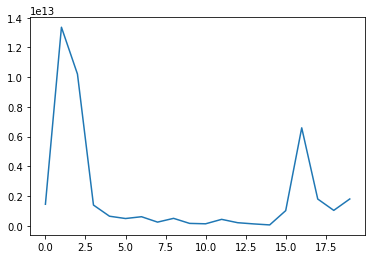

In [60]:
from matplotlib import pyplot as plt

history = model.history.history['loss']
plt.plot(range(len(history)), history)